







# Visibility Distance Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* **ATC** wants to track the weather and predict the visibility distance. To fly the planes the visibility distance is very much important, that is why this project is very much crucial.


### **What is Visibility Distance Prediction?**

* Visibility distance, that means how far any object can be seen from. Based on various climate forcasting parameters, we can predict the visibility distance with machine learning techniques.


## 2. Data Collection
- The data is collected from various sources and dumped into mongodb for our purpose. We have merged the dataset and will work on the data analysis on top of that.

### Feature Information

- **DATE** - 
- **VISIBILITY** - Distance from which can objecy can be seen.
- **DRYBULBTEMPF** - Dry bulb temperature (degrees Farenheit). Most commonly reported standard temperature. 
- **WETBULBTEMPF** - Wet bulb temperature (degrees Farenheit )
- **DewPointTempF** - Dew point temperature ( degrees Farenheit )
- **RelativeHumidity** - Relative humidity (percent )
- **WindSpeed** - Wind speed (miles per hour )
- **WindDirection** - Wind direction from true north using compass directions.
- **StationPressure** - Atmospheric pressure (inches of Mercury; or 'in Hg').
- **SeaLevelPressure** - Sea level pressure ( in Hg).
- **Precip** - Total precipitation in the past hour (in inches )

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("jfk_weather_cleaned.csv")

**Top 5 records**

In [5]:
df.head(5)

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,2010-01-01 02:51:00,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,2010-01-01 03:51:00,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,2010-01-01 04:51:00,5.0,33,32,31,92,0,0,29.93,29.96,0.02


**Shape of the dataset**

In [7]:
df.shape

(75083, 11)

**Summary of the dataset**

In [8]:
# Display summary statistics for a dataframe
df.describe()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000
mean,9.211896,55.355527,49.327544,42.424024,64.812075,11.253240,196.550751,30.005579,30.026049,0.005478
std,2.202311,17.394334,16.182867,19.577957,19.898962,6.101048,107.692804,0.235172,0.234069,0.036161
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,0.000000,28.520000,28.540000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,110.000000,29.860000,29.880000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,200.000000,30.000000,30.020000,0.000000
75%,10.000000,70.000000,64.000000,59.000000,82.000000,15.000000,290.000000,30.150000,30.170000,0.000000
max,14.000000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,30.850000,2.410000


In [9]:
df.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

**reports**
- We can see that there are no missing values.

**Check Datatypes in the dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75083 entries, 0 to 75082
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              75083 non-null  object 
 1   VISIBILITY        75083 non-null  float64
 2   DRYBULBTEMPF      75083 non-null  int64  
 3   WETBULBTEMPF      75083 non-null  int64  
 4   DewPointTempF     75083 non-null  int64  
 5   RelativeHumidity  75083 non-null  int64  
 6   WindSpeed         75083 non-null  int64  
 7   WindDirection     75083 non-null  int64  
 8   StationPressure   75083 non-null  float64
 9   SeaLevelPressure  75083 non-null  float64
 10  Precip            75083 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


- ### let's see how data is distributed for every column


**Exploring Data**

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d %H:%M:%S')

In [12]:
#let's check the datatype
df['DATE']

0       2010-01-01 00:51:00
1       2010-01-01 01:51:00
2       2010-01-01 02:51:00
3       2010-01-01 03:51:00
4       2010-01-01 04:51:00
                ...        
75078   2018-07-27 18:51:00
75079   2018-07-27 19:51:00
75080   2018-07-27 20:51:00
75081   2018-07-27 21:51:00
75082   2018-07-27 22:51:00
Name: DATE, Length: 75083, dtype: datetime64[ns]

In [13]:
df['DATE'].dtype

dtype('<M8[ns]')

In [14]:
df.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,2010-01-01 02:51:00,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,2010-01-01 03:51:00,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,2010-01-01 04:51:00,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [15]:
# define numerical & categorical columns
#Let's drop the ID column

columns = [column for column in df.columns if column != "VISIBILITY"] #visibility is our target column

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['DATE', 'DRYBULBTEMPF', 'WETBULBTEMPF', 'DewPointTempF', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'StationPressure', 'SeaLevelPressure', 'Precip']

We have 0 categorical features : []


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

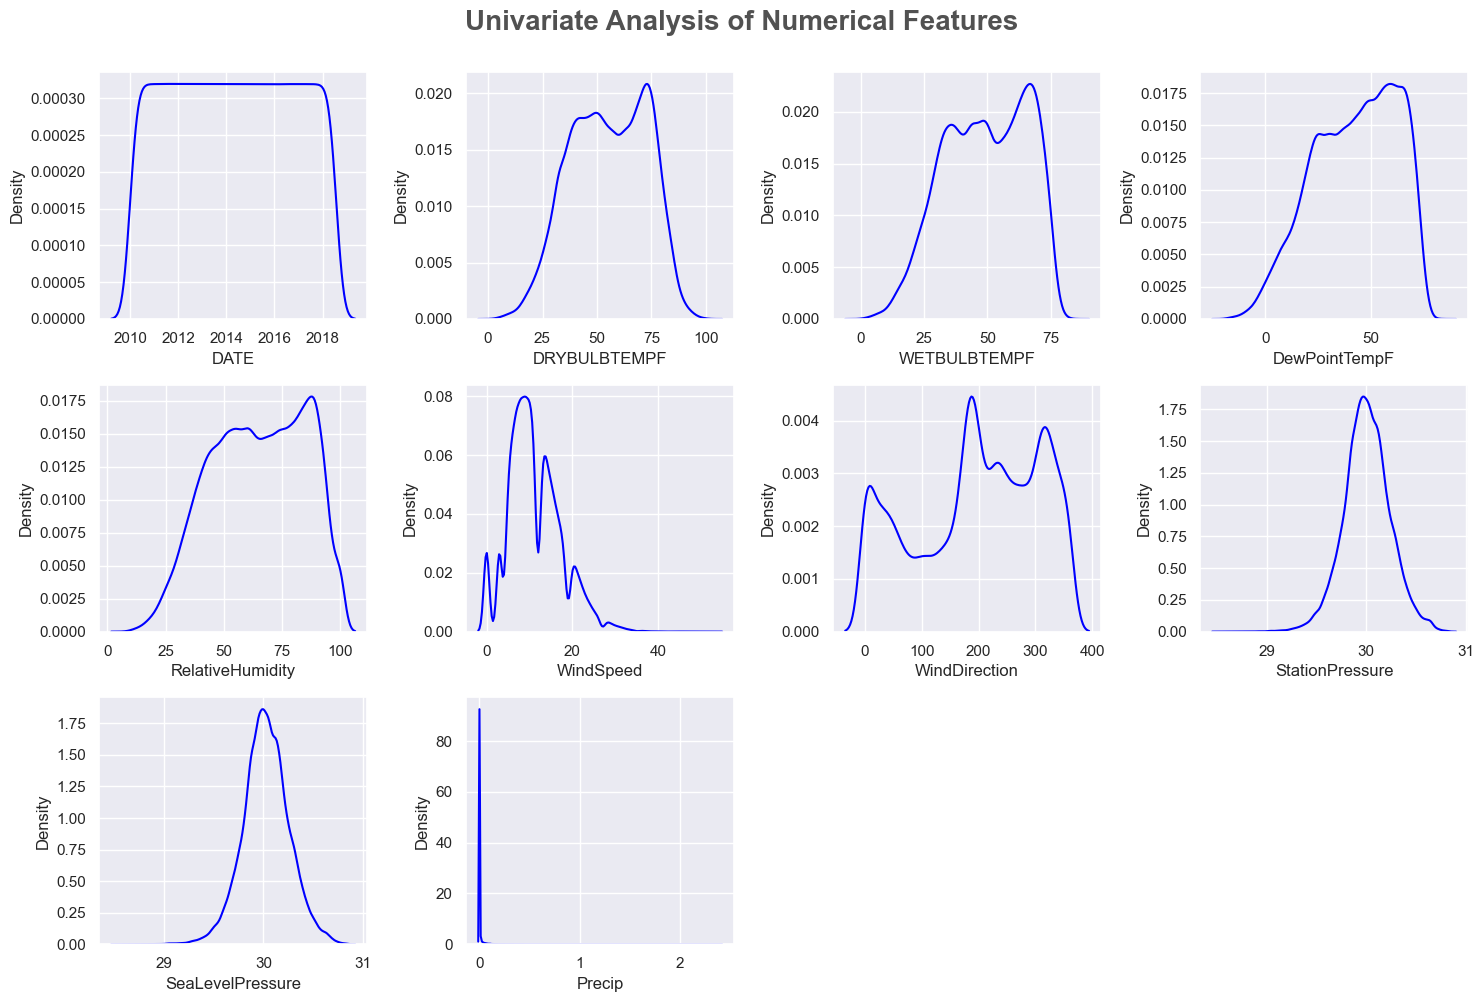

In [16]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

In [17]:
df.columns

Index(['DATE', 'VISIBILITY', 'DRYBULBTEMPF', 'WETBULBTEMPF', 'DewPointTempF',
       'RelativeHumidity', 'WindSpeed', 'WindDirection', 'StationPressure',
       'SeaLevelPressure', 'Precip'],
      dtype='object')

*Report of the univariate analytis*
1. `DATE` - most of the values falls in 2010-2018 range and has outliers.
2. `DRYBULBTEMPF` most of the values falls in 25 - 100 range and has outliers.
3. `WETBULBTEMPF`, `DewPointTempF` are mostly left skewed. Most of the values falls in 25-70 range
4. `RelativeHumidity` is left skewed and most of the values falls in 25-100 range.
5. `WindSpeed` is right-skewed, most of the values falls in 0 - 35 range and has outliers.
6. `WindDirection` is scattered, most of the values falls in 0-50 range and has outliers.
7. `StationPressure`,`SeaLevelPressure` are following a normal distribution and has some outliers.
8. `Precip` is seems to be right skewed, although most of the values are ranging near 0.

### Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

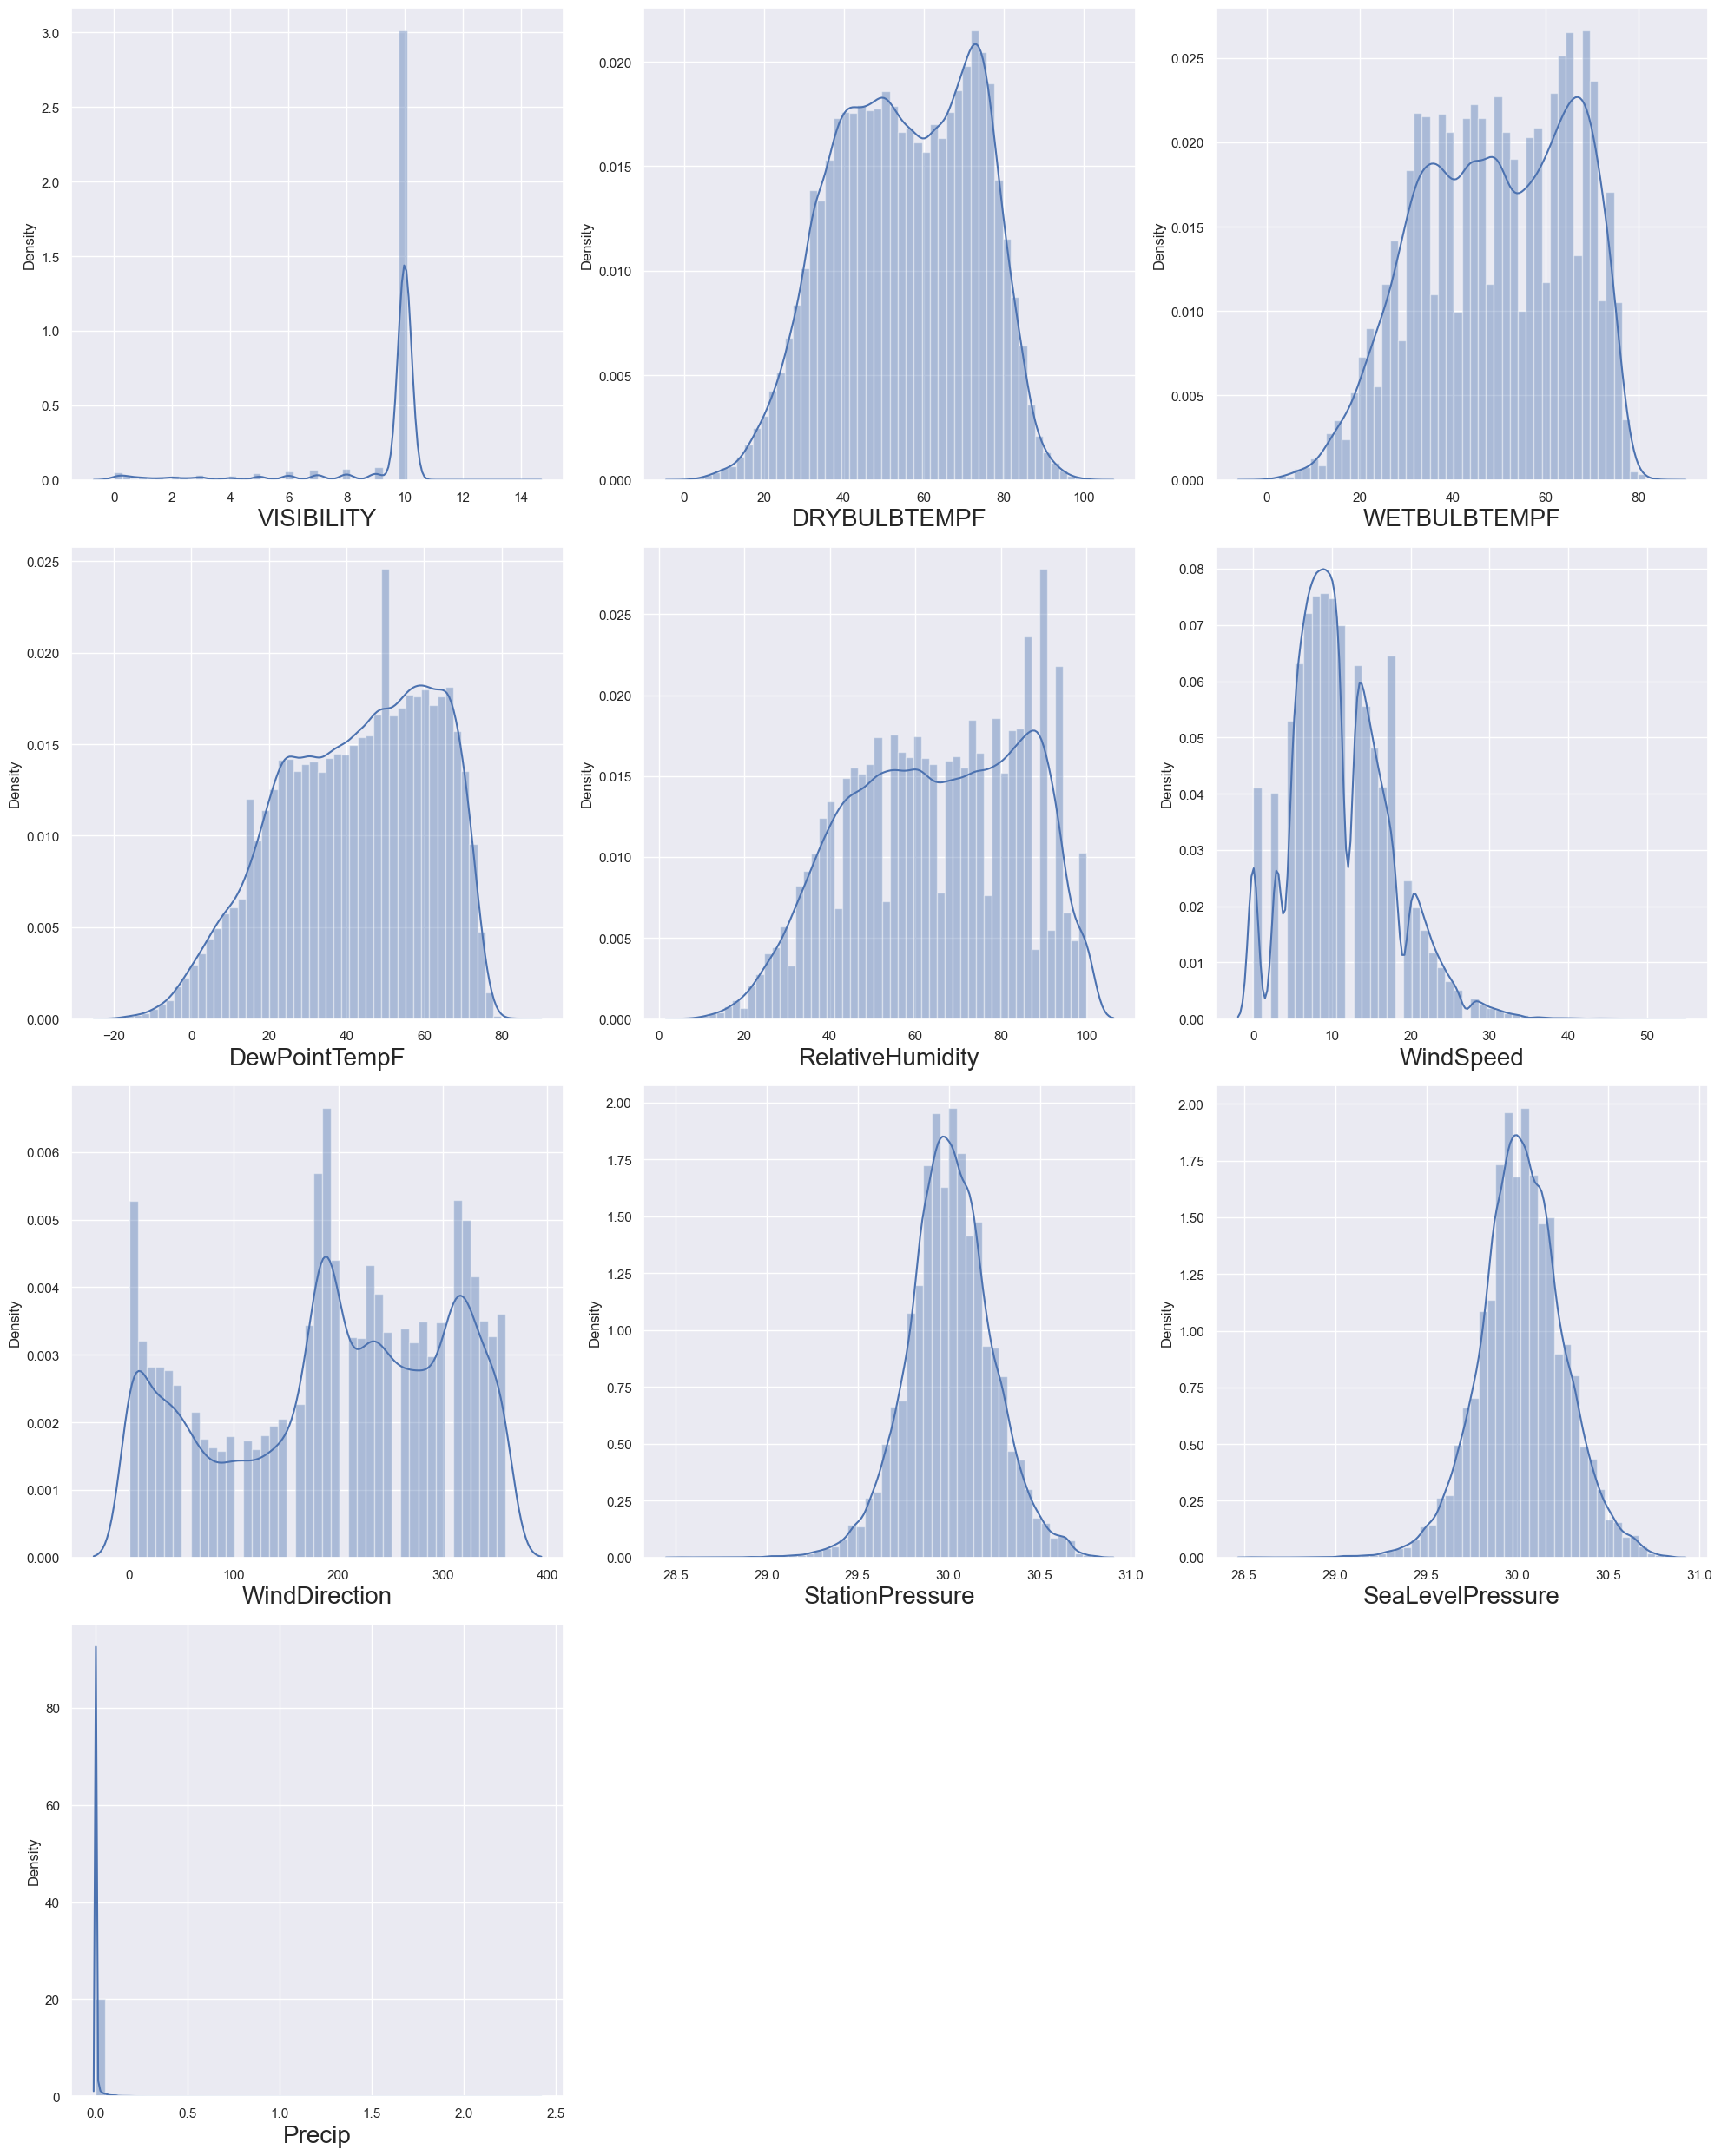

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see some columns are not following normal distribution.

we will use such algorithms which do not require normal distribution such as decision tree and XGBoost.

Also, precipitation column has most of data value near 0. It won't be very useful for our analysis. 
Let's drop this column.

Let's check correlation between the columns :

In [17]:
df = df.drop(columns='Precip')

<AxesSubplot: >

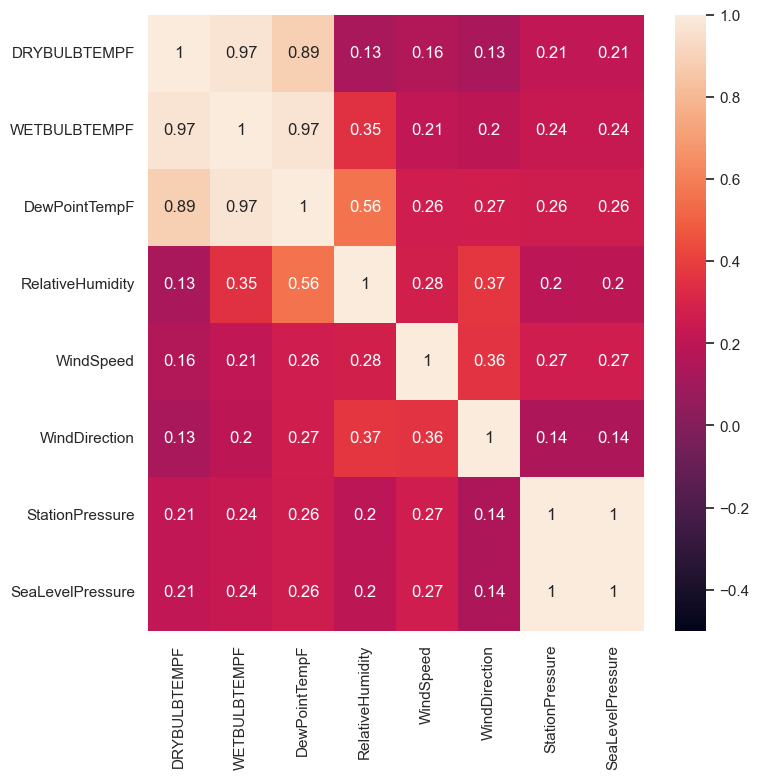

In [15]:
plt.figure(figsize=(8,8))
plt_data = df.drop(columns='VISIBILITY')
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther eis an issue with 3.1.1 , annotation gets cut from top and bottom


There is clear correaltion between some columns.

Let's drop the columns with high correlaion.

In [18]:
df = df.drop(['WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

<Axes: >

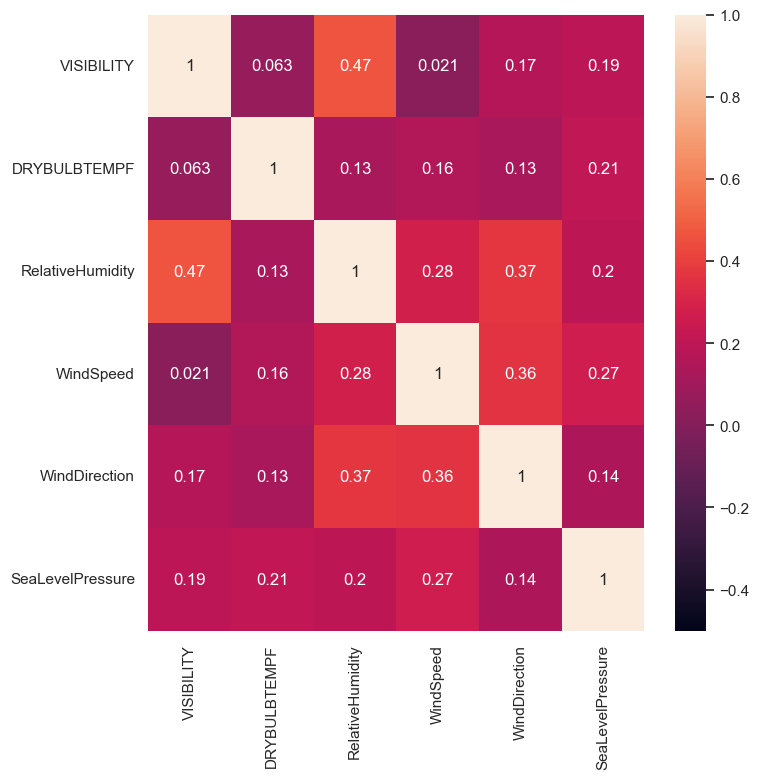

In [20]:
plt.figure(figsize=(8,8))
plt_data =df
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther eis an issue with 3.1.1 , annotation gets cut from top and bottom


### Multicollinearity Check
#### Variance Inflation Factor (VIF)
* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

        
#we will remove the datetime column which is not required for the vif checking
features = df.columns.to_list()
features.pop(features.index('DATE'))

# # we will not chech vif for total spending, as it is the summation of Wines,Fruits,Meat,Fish,Sweets,Gold.
compute_vif(features, df)
# # other_columns

,Variable,VIF
0,VISIBILITY,1.341907
1,DRYBULBTEMPF,1.141377
2,RelativeHumidity,1.609773
3,WindSpeed,1.348445
4,WindDirection,1.310169
5,SeaLevelPressure,1.318955


### We can see the data has no such collinearity

In [19]:
df.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
SeaLevelPressure    0
dtype: int64

**We can see there is null values in Income column, We can impute the null values in feature engineering steps.**

## Analysis Report
* **There are no missing values in the dataset.**
* **The precip column can be deleted because the values can be considered as 0.**
* **There are some columns which are correlated with each other, so we dropped those.**
